In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from calibration.calibration import FilmCalibration
from calibration.image_processing import template_matching

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True
plt.rcParams['image.cmap'] = 'viridis_r'
plt.rcParams.update({'font.size': 14})

In [3]:
calibracion = FilmCalibration.from_json("calibracion_test.json")

In [4]:
for key, value in calibracion.__dict__.items():
    #print(f"{key}: {value}")
    continue

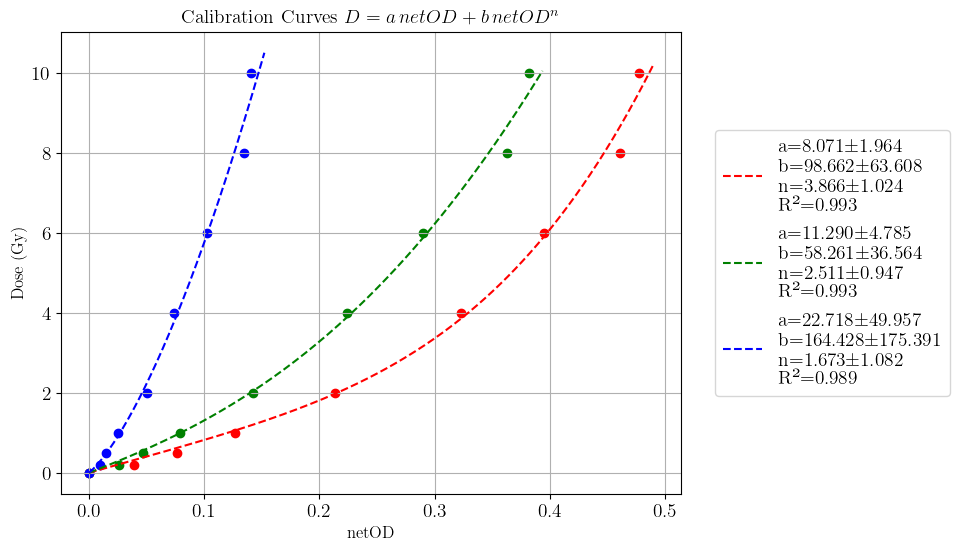

In [5]:
calibracion.graph_calibration_curve()

In [6]:
film_name = "mama100"
film_path = os.path.join("media", f"{film_name}.tif")

In [7]:
tps_name = "mama_TPS.dcm"
tps_path = os.path.join("media", tps_name)

In [8]:
output = os.path.join('media','B_marked_new.tif')

Dimensiones imagen A (cm): 20.0 20.0
Dimensiones imagen B (cm): 25.4762 20.3962
Resolución de la imagen A: 25.60 px/cm x 25.60 px/cm
Resolución de la imagen B: 39.37 px/cm x 39.37 px/cm
Reescalada de la imagen A a: 787x787 píxeles


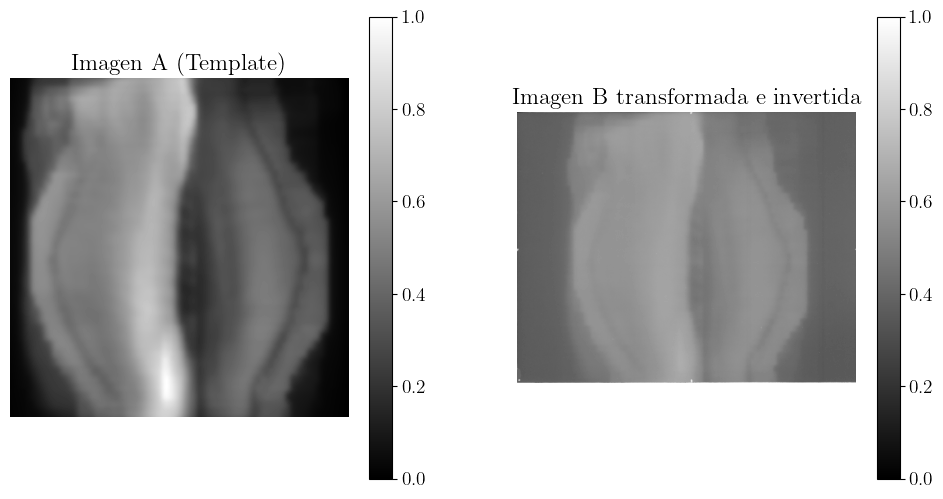

Valor máximo de correlación: 0.976
Ubicación en la imagen transformada (esquina superior izquierda): (119, 13)
Coordenadas en la imagen original para el recorte:
  Esquina superior izquierda: (119, 3)
  Esquina inferior derecha: (906, 790)


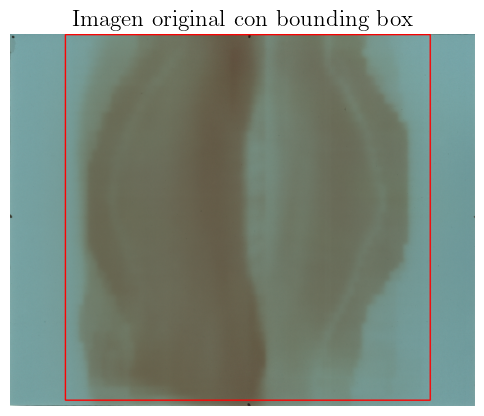

Imagen recortada (reflejada y rotada) guardada como media\B_marked_new.tif


In [9]:
template_matching(tps_path, film_path, output)

In [10]:
film_name = "B_marked_new"
film_path = os.path.join("media", f"{film_name}.tif")

dose_map = calibracion.compute_dose_map(film_path, channel=2)

c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\calibration\functions.py:56: RuntimeWarning: invalid value encountered in power
  return a * x + b * (x ** n)


In [11]:
dose_map.min()

np.float64(0.0)

In [12]:
dose_map.max()

np.float64(52.26799207145343)

In [13]:
dose_map_original = dose_map.copy()

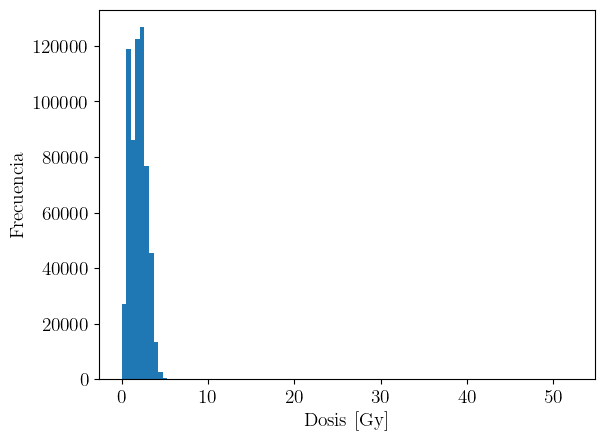

In [14]:
#ver histograma
plt.figure()
plt.hist(dose_map_original.flatten(), bins=100)
plt.xlabel("Dosis [Gy]")
plt.ylabel("Frecuencia")
plt.show()

In [15]:
# filtrar valores mayores de 10 a 0
dose_map[dose_map > 6] = 0

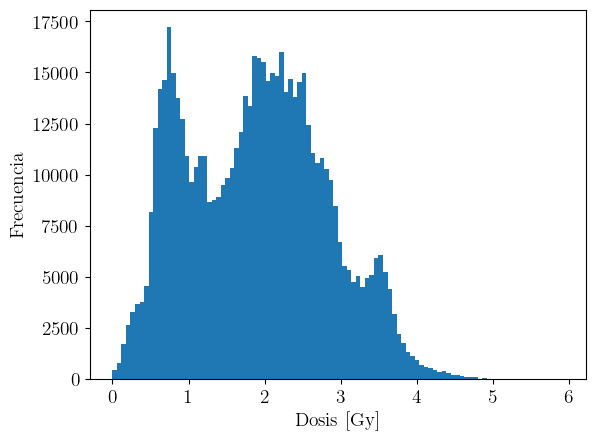

In [16]:
#ver histograma
plt.figure()
plt.hist(dose_map.flatten(), bins=100)
plt.xlabel("Dosis [Gy]")
plt.ylabel("Frecuencia")
plt.show()

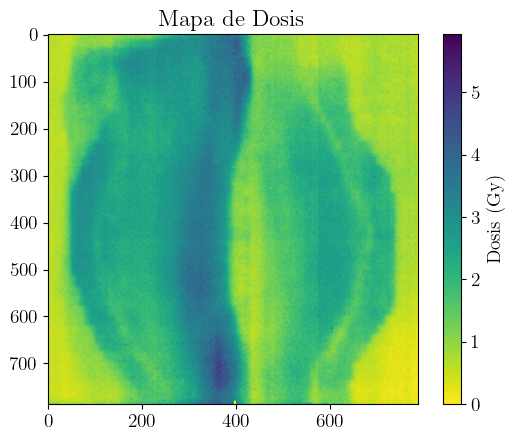

In [17]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map, cmap='viridis_r')
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.show()


c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\calibration\functions.py:56: RuntimeWarning: invalid value encountered in power
  return a * x + b * (x ** n)


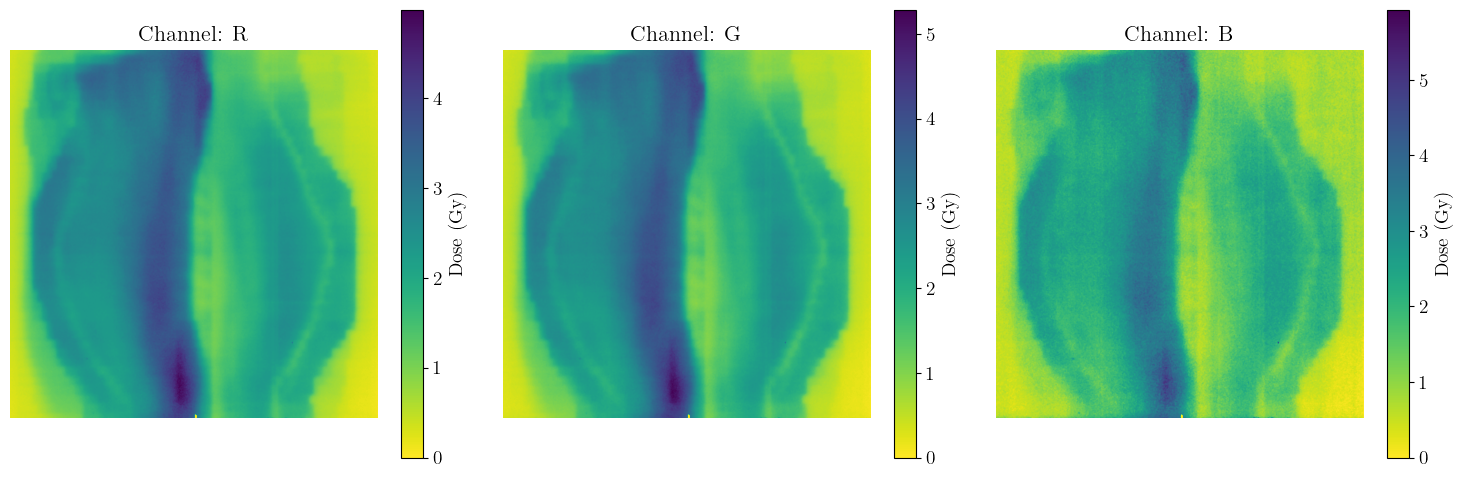

In [25]:
dose_maps = [None]*3
for i in range(3):
    dose_maps[i] = calibracion.compute_dose_map(film_path, channel=i)
    dose_maps[i][dose_maps[i] > 6] = 0

import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    # Guardas el objeto de tipo AxesImage que retorna imshow
    im = axs[i].imshow(dose_maps[i], cmap='viridis_r')
    axs[i].set_title(f'Channel: {canales[i]}', fontsize=16)
    # Aquí creas la barra de color para 'im' asociándola al eje axs[i]
    fig.colorbar(im, ax=axs[i], label='Dose (Gy)')
    # O también podrías usar plt.colorbar(im, ax=axs[i], label='Dosis (Gy)')

    # Corrige la llamada a set_axis_off (que es un método y se ejecuta con paréntesis)
    axs[i].set_axis_off()

plt.tight_layout()
plt.show()


In [19]:
aaa

NameError: name 'aaa' is not defined

In [ ]:
# Exportar cadaa uno de los mapas de dosis como mapa de dosis

for i in range(3):
    np.save(f'{film_name}_dose_map_channel_{i}.npy', dose_maps[i])

In [23]:
film_name= "mama100cropped"

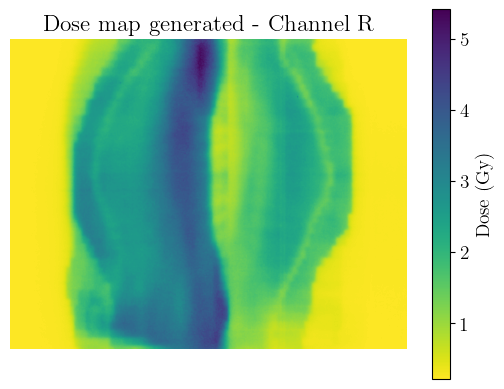

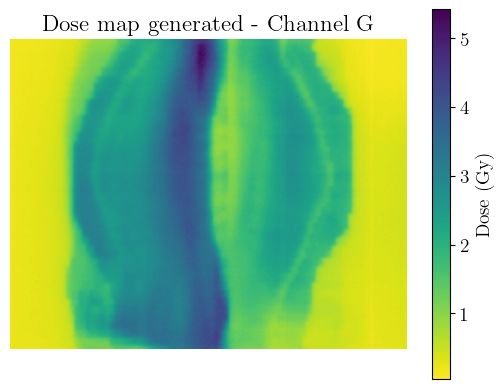

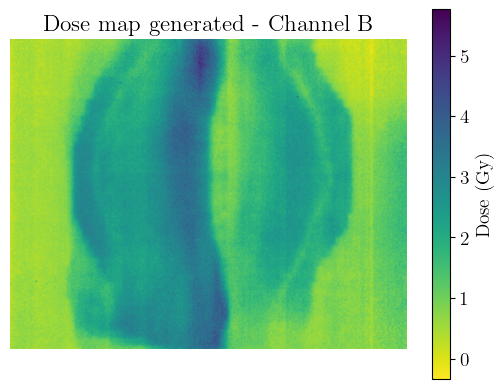

In [24]:
# Importar los mapas de dosis y graficarlos
canales = ['R', 'G', 'B']
for i in range(3):
    dose_map = np.load(f'{film_name}_dose_map_channel_{i}.npy')
    plt.imshow(dose_map, cmap='viridis_r')
    plt.colorbar(label='Dose (Gy)')
    # axis off
    plt.axis('off')
    plt.title(f'Dose map generated - Channel {canales[i]}')
    plt.show()